In [17]:
!pip install -Uqq fastai duckduckgo_search

In [18]:
from duckduckgo_search import DDGS
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}' ")
    return L(DDGS().images(keywords=term,max_results=max_images)).itemgot('image')

In [19]:
urls = search_images('bird photos', max_images=2)
urls[0,1]

Searching for 'bird photos' 


(#2) ['https://images.pexels.com/photos/1661179/pexels-photo-1661179.jpeg?cs=srgb&dl=green-bird-1661179.jpg&fm=jpg','https://images.pexels.com/photos/97533/pexels-photo-97533.jpeg?cs=srgb&dl=animal-avian-bird-97533.jpg&fm=jpg']

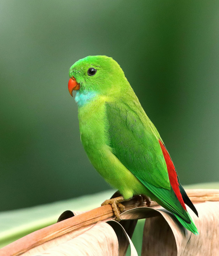

In [20]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256, 256)

Searching for 'forest photos' 


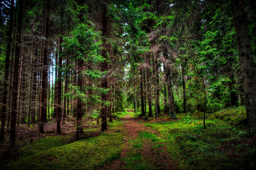

In [21]:
download_url(search_images('forest photos', max_images=1)[0], "forest.jpg", show_progress=False)
Image.open('forest.jpg').to_thumb(256, 256)

In [24]:
searches = 'forest', 'bird'
path =  Path('bird or not')
from time import sleep

for item in searches:
    dest = (path/item)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{item} photos'))
    sleep(10)
    download_images(dest, urls=search_images(f'{item} sun photos'))
    sleep(10)
    download_images(dest, urls=search_images(f'{item} shade photos'))
    sleep(10)
    resize_images(path/item, max_size=400, dest=path/item)

Searching for 'forest photos' 


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Searching for 'forest sun photos' 
Searching for 'forest shade photos' 
Searching for 'bird photos' 
Searching for 'bird sun photos' 
Searching for 'bird shade photos' 


In [29]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


1

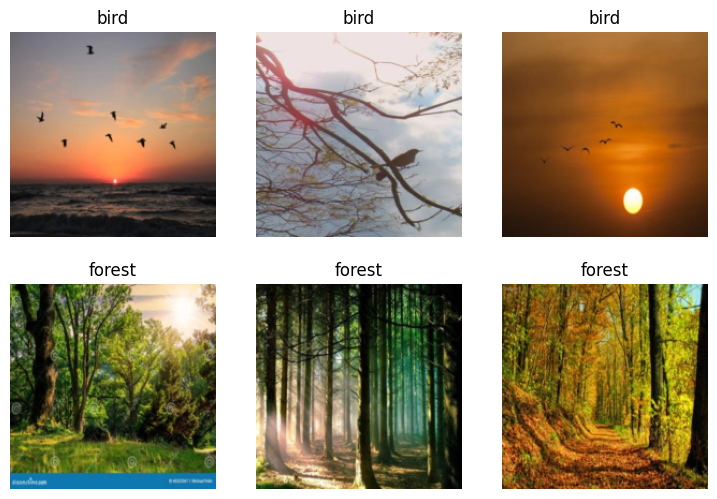

In [31]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter= RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n = 6)

In [33]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.728606,0.107320,0.029412,00:18


epoch,train_loss,valid_loss,error_rate,time
0,0.142833,0.046476,0.029412,00:27
1,0.101119,0.032728,0.029412,00:26
2,0.073055,0.022300,0.000000,00:26
3,0.053641,0.024279,0.000000,00:26
4,0.044172,0.026598,0.029412,00:26


In [35]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 1.0000
